In [1]:
from pathlib import Path

import pandas as pd

from data_common.pandas.df_extensions.space import Cluster
import  data_common.pandas.df_extensions.viz
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
df = pd.read_parquet(Path("..", "data", "raw", "division_cluster_columns.parquet"))

# if 'cy-senedd' in division_id, drop it

df = df[~df["division_id"].str.contains("cy-senedd")]

df = df.set_index("division_id")

df = df.sample(5000)
df

,opp_aye_p,opp_no_p,gov_aye_p,gov_no_p
division_id,,,,
pw-2021-12-08-142-commons,0.800699,0.020979,0.000000,0.812155
pw-2024-03-11-2-lords,0.372401,0.037807,0.006849,0.613014
pw-2024-06-12-1-scotland,0.430769,0.415385,0.015625,0.843750
pw-2020-06-10-1-scotland,0.235294,0.000000,0.590164,0.000000
pw-2015-06-22-22-commons,0.609375,0.003125,0.000000,0.936364
...,...,...,...,...
pw-2004-10-15-262-commons,0.000000,0.059524,0.004914,0.029484
pw-2007-10-15-209-commons,0.588435,0.003401,0.000000,0.761364
pw-2023-01-31-6-scotland,0.421053,0.526316,0.916667,0.000000


In [21]:
#df.to_parquet(Path("..", "data", "raw", "division_cluster_columns_sample.parquet"))

# changes above ignored

consistent_sample = pd.read_parquet(Path("..", "data", "raw", "division_cluster_columns_sample.parquet"))

df = consistent_sample

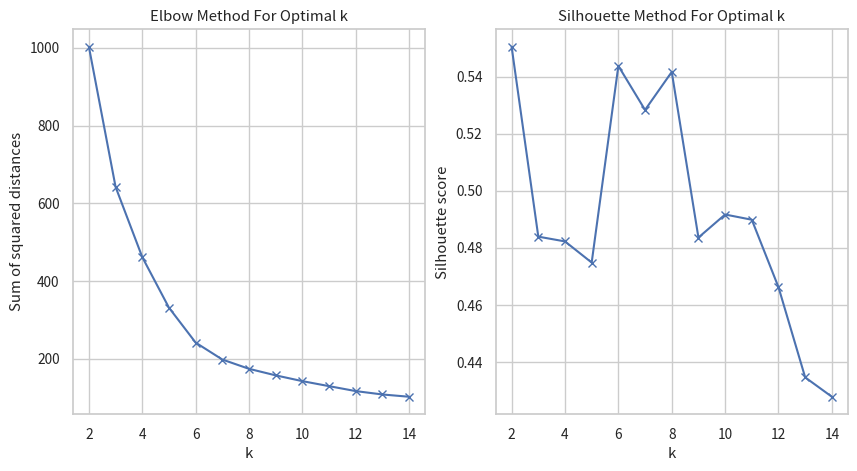

In [16]:
# We don't normalise because we've alread done something *a bit* like that in a previous step, and we want relatively
# raw numbers to be able to calculate quickly later
cluster = Cluster(df, normalize=False)
cluster.find_k()

In [33]:
cluster = cluster.set_k(8)



In [34]:
cluster.stats()

,count,%,random members
labels,,,
1: opp_strong_aye_gov_strong_no,1143,22.9,"[pw-2024-07-09-5453-en-senedd, pw-2018-12-05-1..."
2: gov_aye_opp_lean_no,352,7.0,"[pw-2019-06-18-14-scotland, pw-2018-03-21-27-s..."
3: opp_aye_weak_gov_no,924,18.5,"[pw-2004-11-17-3-lords, pw-2016-04-26-4-lords,..."
4: gov_aye_opp_weak_no,262,5.2,"[pw-2019-11-20-1875-en-senedd, pw-2024-01-17-5..."
5: gov_no_opp_lean_no,644,12.9,"[pw-2024-03-26-3-scotland, pw-2005-06-29-23-co..."
6: low_participation,545,10.9,"[pw-2012-03-22-7-scotland, pw-2019-04-04-12-lo..."
7: gov_strong_aye_opp_strong_no,797,15.9,"[pw-2008-07-02-249-commons, pw-2004-02-11-54-c..."
8: cross_party_aye,333,6.7,"[pw-2014-02-10-207-commons, pw-2014-11-24-94-c..."


In [35]:
cluster = cluster.add_labels(
    {
        1: (
            "opp_strong_aye_gov_strong_no",
            "Opposition strongly in favour, government strongly against",
        ),
        2: (
            "gov_aye_opp_lean_no",
            "Government propose, opposition split (mild lean no in aggregate)",
        ),
        3: (
            "opp_aye_weak_gov_no",
            "Opposition weakly in favour, government strongly against",
        ),
        4: ("gov_aye_opp_weak_no", ""),
        5: (
            "gov_no_opp_lean_no",
            "Government opposes, opposition split (mild lean no in aggregate)",
        ),
        6: (
            "low_participation",
            "Low participation vote across both sides",
        ),
        7: (
            "gov_strong_aye_opp_strong_no",
            "Government strongly in favour, opposition strongly against",
        ),
        8: (
            "cross_party_aye",
            "Cross party support"
        ),
    }
)

In [31]:
cluster.raincloud_tool(reverse=True)

interactive(children=(Dropdown(description='cluster_label', options=('1: opp_strong_aye_gov_strong_no', '2: go…

In [51]:
cluster.cluster_results[8]

# get centers

results_df = pd.DataFrame(cluster.cluster_results[8].cluster_centers_, columns=cluster.df.columns)
results_df["labels"] = list(cluster.label_names[8].values())
results_df = results_df.set_index("labels")
results_df

,opp_aye_p,opp_no_p,gov_aye_p,gov_no_p
labels,,,,
opp_strong_aye_gov_strong_no,0.740442,0.033920,0.005522,0.849527
gov_aye_opp_lean_no,0.373178,0.438036,0.876472,0.002921
opp_aye_weak_gov_no,0.276109,0.048318,0.011602,0.603778
gov_aye_opp_weak_no,0.091135,0.171825,0.743013,0.009060
gov_no_opp_lean_no,0.373179,0.445175,0.010658,0.885912
low_participation,0.050518,0.031493,0.023114,0.041239
gov_strong_aye_opp_strong_no,0.024390,0.748452,0.843022,0.007560
cross_party_aye,0.665042,0.060009,0.833905,0.012985


In [53]:
results_df.to_csv(Path("..", "data", "interim", "cluster_centers.csv"))